In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

dati=pd.read_json("./data/dati-json/dpc-covid19-ita-regioni.json", convert_dates=["data"])
aree = [
    {
        "name": "italia",
        "content": range(20)
    },
    {
        "name": "nord",
        "content": [1, 2, 3, 4, 5, 6, 7, 8]
    },
    {
        "name": "centro",
        "content": [9, 10, 11, 12]
    },
    {
        "name": "sud w/o isole",
        "content": [13, 14, 15, 16, 17, 18] # 13 abruzzo, 20 sardegna
    },
    {
        "name": "isole",
        "content": [19,20]
    },
    {
        "name": "sicilia",
        "content": [19]
    }
]


def filter_area(df, area):
    return df.loc[ df['codice_regione'].apply(lambda x: x in area['content']) ]

print ("{}".format(pd.Timestamp.now() - dati['data'].max()))

0 days 18:05:22.527386


CPU times: user 6.03 s, sys: 33.6 ms, total: 6.06 s
Wall time: 6.09 s


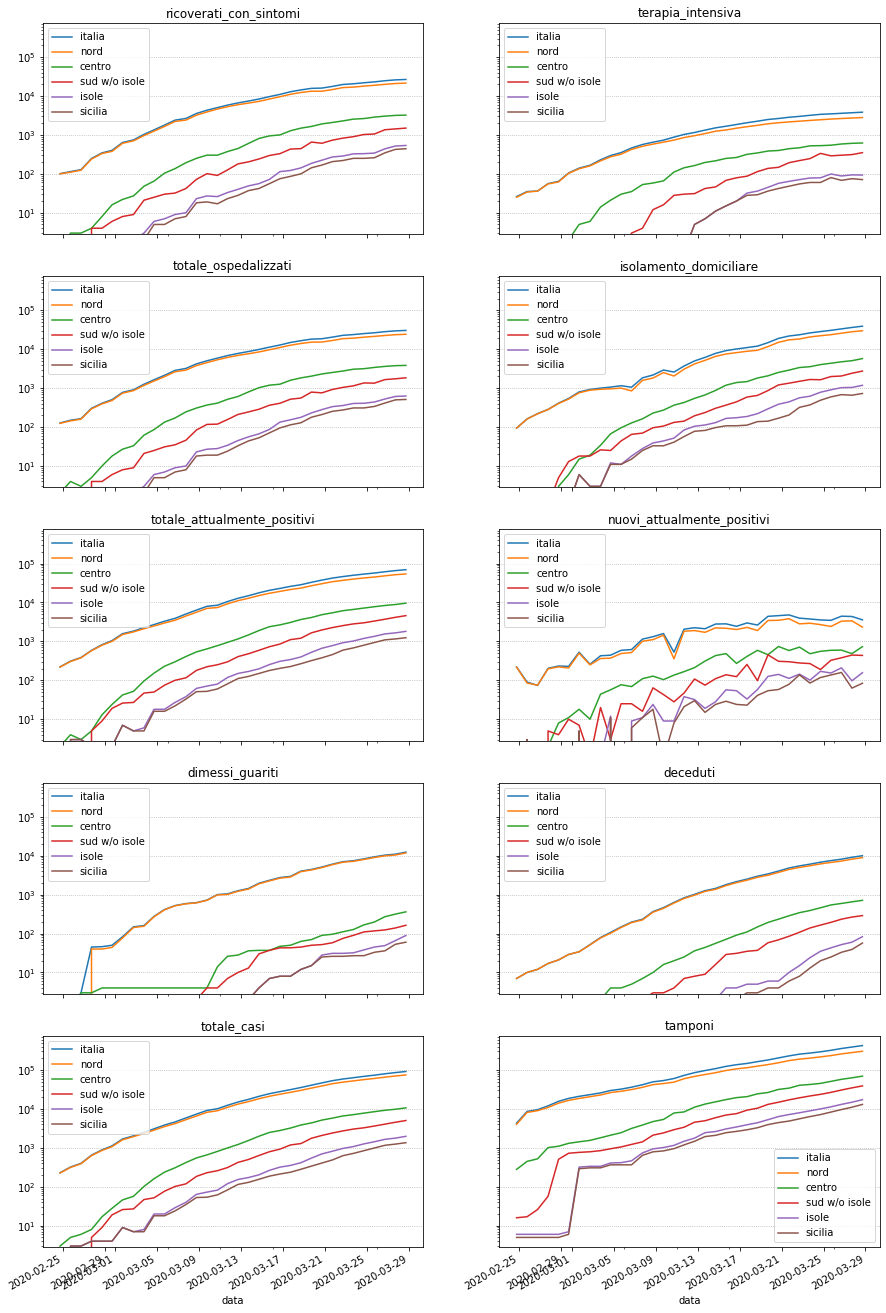

In [2]:
%%time
colonne = [
    "ricoverati_con_sintomi",
    "terapia_intensiva",
    "totale_ospedalizzati",
    "isolamento_domiciliare",
    "totale_attualmente_positivi",
    "nuovi_attualmente_positivi",
    "dimessi_guariti",
    "deceduti",
    "totale_casi",
    "tamponi"
]

fig, axes = plt.subplots(5,2,sharex=True,sharey=True,figsize=(15,25))

i=0
    
for a in aree:
    t = filter_area(dati, a).groupby("data").sum()
    for c in colonne:
        ax = axes.flatten()[i % len(axes.flatten())]; i += 1
        
        t.plot(y=c, ax=ax, label=a['name'], title=c)
        ax.semilogy()
        ax.grid(axis='y', ls=':')

fig.show()

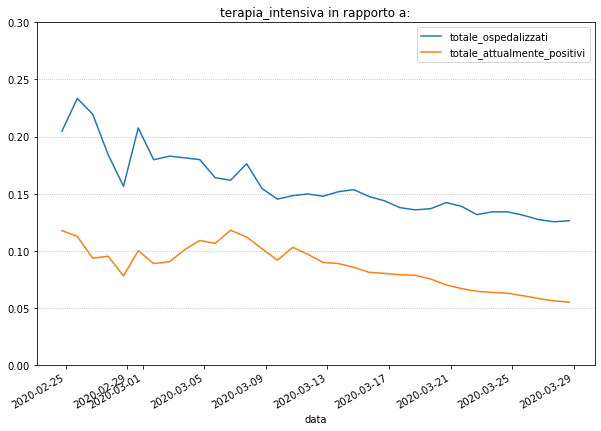

In [3]:
fig, ax = plt.subplots(figsize=(10,7))
complessiva=dati.groupby("data").sum()
(complessiva['terapia_intensiva']/complessiva['totale_ospedalizzati'])\
    .plot(ax=ax, label='totale_ospedalizzati')
(complessiva['terapia_intensiva']/complessiva['totale_attualmente_positivi'])\
    .plot(ax=ax, label='totale_attualmente_positivi')
ax.grid(ls=':', axis='y')
ax.set_ylim(bottom=0, top=.3)
ax.set_title('terapia_intensiva in rapporto a:')
ax.legend()
fig.show()

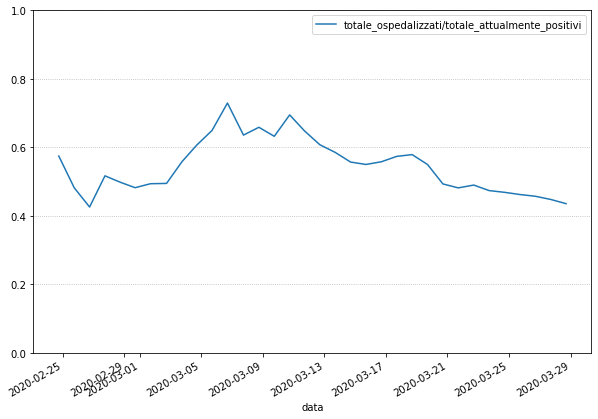

In [4]:
fig, ax = plt.subplots(figsize=(10,7))
(complessiva['totale_ospedalizzati']/complessiva['totale_attualmente_positivi'])\
    .plot(ax=ax, label='totale_ospedalizzati/totale_attualmente_positivi')
ax.grid(ls=':', axis='y')
ax.set_ylim(bottom=0, top=1)
ax.legend()
fig.show()

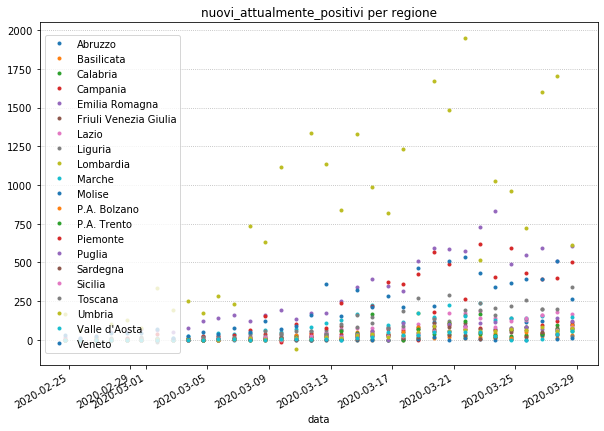

In [5]:
fig, ax = plt.subplots(figsize=(10,7))

for n,t in dati.groupby("denominazione_regione"):
    t.groupby("data").sum().plot(ax=ax, ls='', marker='.', label=n, y='nuovi_attualmente_positivi')
    
#ax.semilogy()
ax.set_title("nuovi_attualmente_positivi per regione")
ax.grid(axis='y', ls=':')

# L'unico scopo di questo grafico è vedere se mancano regioni negli ultimi dati.
#ax.set_ylim((-1,10))
ax.legend(loc=6)